## Научится считать корреляцию между двумя изображениями

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline

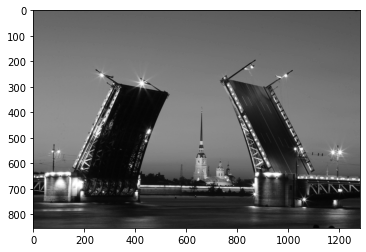

In [12]:
url = 'https://courses.openedu.ru/assets/courseware/v1/b1c17f10f3175e5c8a4dffa2257cf01b/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/russia-2396022_1280.jpg'
image = imutils.url_to_image(url)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_RGB, cmap='gray')
plt.show()

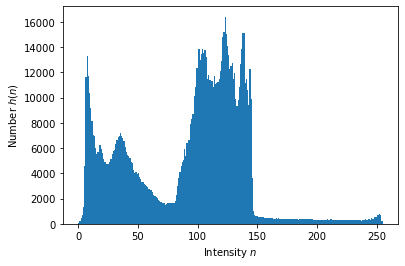

In [14]:
gray_hist = plt.hist(image_gray.ravel(), bins = 256)
plt.xlabel('Intensity $n$')
plt.ylabel('Number $h(n)$')
plt.show()

In [27]:
max_f = max(gray_hist[0])
index_f = np.where(gray_hist[0] == max(gray_hist[0]))
print("Max intensivety", max_f)
print("Corresponding n", index_f)

Max intensivety 16416.0
Corresponding n (array([123], dtype=int64),)


In [21]:
type(gray_hist[1])

numpy.ndarray

# Task2

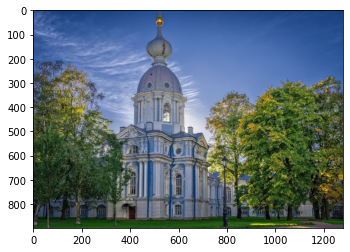

In [55]:
url1 = 'https://courses.openedu.ru/assets/courseware/v1/65479e344e840f62001e9973cf209fff/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/monastery-3714287_1280.jpg'
image1 = imutils.url_to_image(url1)
image1_RGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1_RGB);

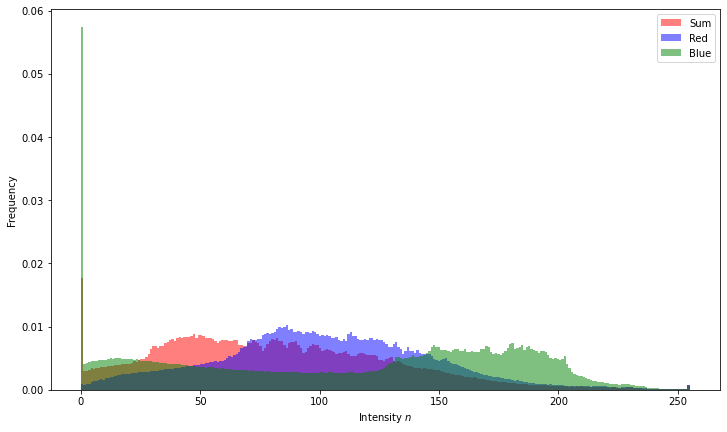

In [56]:
#hist_sum = plt.hist(image1_RGB.ravel(), bins = 256, color = 'Orange', alpha = 0.5, density=True)
plt.figure(figsize = (12,7))
hist_red = plt.hist(image1_RGB[:,:,0].ravel(), bins = 256, color = "Red", alpha = 0.5, density=True)
hist_blue = plt.hist(image1_RGB[:,:,1].ravel(), bins = 256, color = "Blue", alpha = 0.5, density=True)
hist_green = plt.hist(image1_RGB[:,:,2].ravel(), bins = 256, color = "Green", alpha = 0.5, density=True)
plt.legend(["Sum","Red", "Blue", "Green"])
plt.xlabel('Intensity $n$')
plt.ylabel('Frequency')
plt.show()

In [57]:
print("Red_max", max(hist_red[0]))
print("Blue_max", max(hist_blue[0]))
print("Green_max", max(hist_green[0]))

Red_max 0.01772252393727235
Blue_max 0.01021876158694846
Green_max 0.05733254814717878


# Task 3

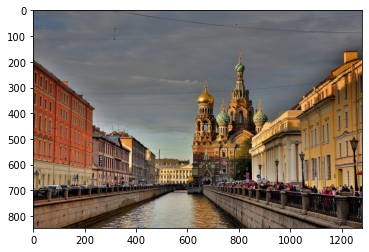

In [65]:
url2 = 'https://courses.openedu.ru/assets/courseware/v1/6182b1490640a39a8b2112de7adb670e/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/st-petersburg-russia-3747214_1280.jpg'
image2 = imutils.url_to_image(url2)
image2_RGB = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2_RGB)
plt.show();

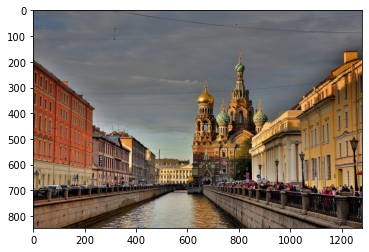

[136 135 130]


In [66]:
image2_norm = image2_RGB
hist_red = image2_RGB[:,:,0]
hist_blue = image2_RGB[:,:,1]
hist_green = image2_RGB[:,:,2]
image2_norm[:,:,0] = (hist_red - np.min(hist_red)) / (np.max(hist_red) - np.min(hist_red)) * 255
image2_norm[:,:,1] = (hist_blue - np.min(hist_blue)) / (np.max(hist_blue) - np.min(hist_blue)) * 255
image2_norm[:,:,2] = (hist_green - np.min(hist_green)) / (np.max(hist_green) - np.min(hist_green)) * 255
plt.imshow(image2_norm)
plt.show()
print(image2_norm[447, 612])

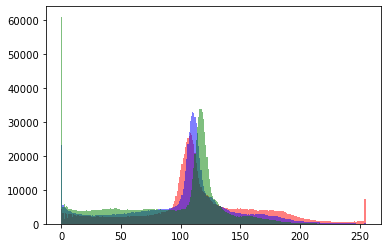

In [115]:
def get_hist(image):
    hist_red = image[:,:,0]
    hist_blue = image[:,:,1]
    hist_green = image[:,:,2]
    plt.hist(hist_red.ravel(), bins = 256, color = "Red", alpha = 0.5)
    plt.hist(hist_blue.ravel(), bins = 256, color = "Blue", alpha = 0.5)
    plt.hist(hist_green.ravel(), bins = 256, color = "Green", alpha = 0.5)
    plt.show();
get_hist(image2_RGB)

# GaussianBlur

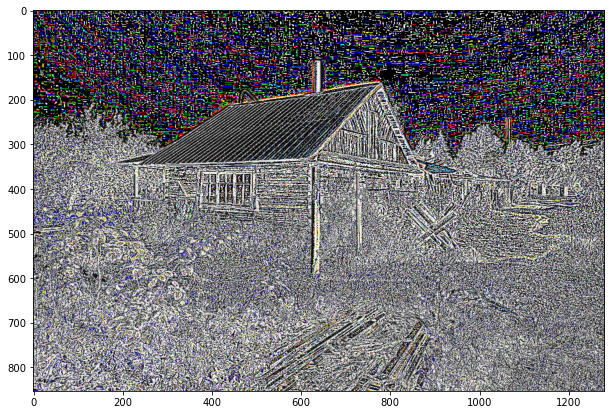

In [85]:
url3 = "https://courses.openedu.ru/assets/courseware/v1/9a395139a20d0a4b4d869db364fd42d4/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/village-5511732_1280.jpg"
image3 = imutils.url_to_image(url3)
image3_RGB = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image3_gauss = cv2.GaussianBlur(image3_RGB, (11,7), 3)
image3_add_detail = image3_RGB - image3_gauss
plt.figure(figsize = (14,7))
plt.imshow(image3_add_detail)
plt.show();

In [100]:
url_list = ['https://courses.openedu.ru/assets/courseware/v1/d5789c43ba9f755e2a424ab9a33bb2ed/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_117_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/845b650d50820e616b6d56655cc0653d/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_220_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/14e94c48660d55301855e8b30f4fa7b3/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_222_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/1b8aa0ae9cb244cdf191434bc5163862/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_267_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/f53d80a20ec5aaf99b24bc495362fd41/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_338_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/6444d850616d606857b1b603aa440cdf/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_394_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/0f4803a06afdf8ba534cd75cb262a477/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_416_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/9e45f66455a77e38d572c73d81bf5f54/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_480_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/6bebf2a035680d990705b1771e2d971c/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_533_village-5511732_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/ace5ce15702e3b68ea3ddc7efe8ddc2d/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/crop_670_village-5511732_1280.jpg'
           ]
for url in url_list:
    image = imutils.url_to_image(url)
    if np.all(image3_add_detail == image):
        plt.figure(figsize = (15,7))
        plt.imshow(image_clean)
        plt.show();

# Task4

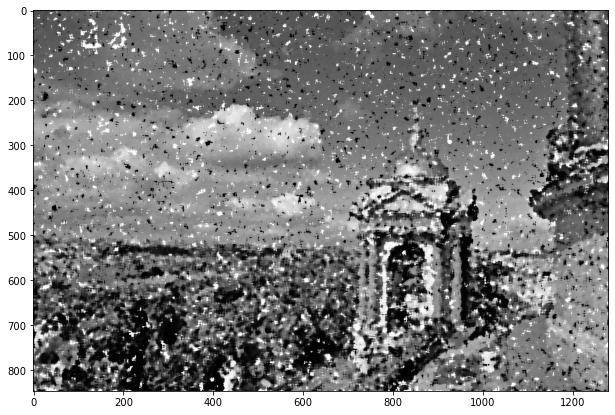

In [19]:
url4 = 'https://courses.openedu.ru/assets/courseware/v1/4f506ce93d7a12e14b99885402a8652f/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/blur_peter-3794597_1280.jpg'
image4 = cv2.cvtColor(imutils.url_to_image(url4), cv2.COLOR_BGR2GRAY)
kernel_size = 9 # must be more than 2
image_clean = cv2.medianBlur(image4, kernel_size)
url = 'https://courses.openedu.ru/assets/courseware/v1/ca54904407995d200b1b9f5dd29031eb/asset-v1:ITMOUniversity+IMAGPROC+spring_2021_ITMO_mag+type@asset+block/peter-3794597_1280.jpg'
image = imutils.url_to_image(url)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_recover = image_clean + cv2.GaussianBlur(image_gray, (11,7), 3)
plt.figure(figsize = (15,7))
plt.imshow(image_clean, cmap = 'gray')
plt.show();